## Librerias
Cargo librerias y módulos

In [7]:
# Librerias generales
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Modulos específicos para árboles de decisión
from sklearn.tree import DecisionTreeClassifier # Arboles de decisión para clasificación
from sklearn.tree import DecisionTreeRegressor # Arboles de decisión para regresión
from sklearn.tree import plot_tree # Función para visualizar el árbol

from sklearn.ensemble import RandomForestClassifier # Random forests para clasificación
from sklearn.ensemble import RandomForestRegressor # Random forests para decisión

from sklearn.preprocessing import OneHotEncoder #OneHotEncoder para variables cualitativas
from sklearn.preprocessing import LabelEncoder

# Módulos utiles para evaluar el modelo
from sklearn.model_selection import train_test_split # Para separar en train y test
from sklearn.model_selection import cross_val_score # Para hacer cross-validation y evaluar el modelo

## Base de datos
Se trabajara con la base de datos "Argentina Car Pieces" la cual obtiene sus datos de Mercado Libre. Hay que realizar un acondicionamiento de datos ya que algunos autos tienen sus precios en dolares y otros en pesos.

In [8]:
# Path Dataset
filename = 'C:\\Users\\Bruno\\Desktop\\Data Science\\DataSets\\Credit_card.csv'
filename2 = 'C:\\Users\\Bruno\\Desktop\\Data Science\\DataSets\\Credit_card_label.csv'

# Carga del dataset
df1 = pd.read_csv(filename)
df2 = pd.read_csv(filename2)
# Logaritmo en base 10 del precio
df_final = pd.merge(df1, df2, on='Ind_ID')
df = df_final.dropna()

print('Dimensión del dataset: {}'.format(df.shape))

# Inspección de los primeros datos
df.head()


Dimensión del dataset: (1025, 19)


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,1,1
11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1


## Acondicionamiento de Datos

In [15]:

cat_col = []
num_col = []
label_encoder = {}

for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)


for col in cat_col:
    label_encoder[col] = LabelEncoder()
    df[col] = label_encoder[col].fit_transform(df[col])

df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
8,5010864,1,1,1,1,450000.0,0,3,1,1,-18173.0,-678,1,0,1,1,3,3,1
9,5010868,1,1,1,1,450000.0,1,3,1,1,-18173.0,-678,1,0,1,1,3,3,1
10,5010869,1,1,1,1,450000.0,0,3,3,1,-18173.0,-678,1,0,1,1,3,1,1
11,5018498,0,1,1,0,90000.0,3,3,1,1,-18950.0,-1002,1,1,1,0,2,2,1
13,5018503,0,1,1,0,90000.0,3,3,1,1,-18950.0,-1002,1,1,1,0,2,2,1


## Determinacion de features, datos de train y test

In [16]:
# Lista de features a considerar
features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income','Type_Income', 'EDUCATION', 'Type_Occupation' ]

#Variable a predecir
target = 'label'

# Construcción de la matriz de features
X = df[features].to_numpy()

# Construcción del vector a predecir
y = df[target].to_numpy()

# Creacion de las matrices de entrenamiento y testeo.
random_seed = 24
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = random_seed)

print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

Dimensión de la matriz de features para entrenamiento: (922, 8)
Dimensión de la matriz de features para testeo: (103, 8)


## Clasificacion con Arbol de decision

In [17]:
# Construcción del árbol de decisión de profundidad 3
dtc = DecisionTreeClassifier(max_leaf_nodes = 3, random_state = random_seed)

dtc.fit(X_train, y_train)

# Score del modelo en los datos de entrenamiento
score_in_train = dtc.score(X_train, y_train)

# Score del modelo en el conjunto de testeo
score_in_test = dtc.score(X_test, y_test)

print('Score en el set de entrenamiento: {}'.format(score_in_train))
print('Score en el set de testeo: {}'.format(score_in_test))

Score en el set de entrenamiento: 0.8926247288503254
Score en el set de testeo: 0.8932038834951457


[Text(0.6, 0.8333333333333334, 'Annual_income <= 389250.0\ngini = 0.192\nsamples = 922\nvalue = [823, 99]'),
 Text(0.4, 0.5, 'Type_Occupation <= 15.5\ngini = 0.181\nsamples = 877\nvalue = [789, 88]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.172\nsamples = 852\nvalue = [771, 81]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.403\nsamples = 25\nvalue = [18, 7]'),
 Text(0.8, 0.5, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]')]

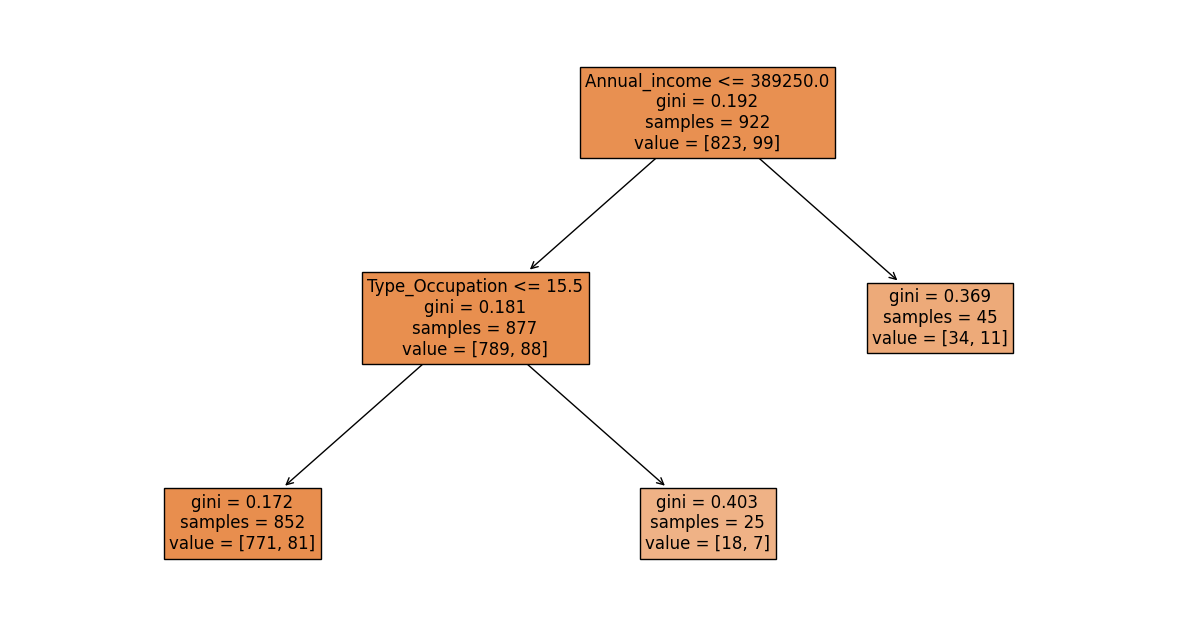

In [33]:
# Creamos la figura donde plotear el árbol con matplotlib
fig, ax = plt.subplots(figsize = (15, 8))

# Llamamos a la función "plot_tree" que importamos de sklearn.tree más arriba.
plot_tree(dtc, feature_names=features, fontsize = 12, filled = True, ax = ax)

## Clasificacion con RandomForest

In [37]:
# Construcción del clasificador como Random Forest
rfc = RandomForestClassifier(n_estimators=1500)

# Entrenamiento del modelo
rfc.fit(X_train, y_train)

rfc.predict_proba(X_test)

array([[7.42666667e-01, 2.57333333e-01],
       [1.00000000e+00, 0.00000000e+00],
       [9.99777778e-01, 2.22222222e-04],
       [5.54229365e-01, 4.45770635e-01],
       [7.02192063e-01, 2.97807937e-01],
       [8.83600000e-01, 1.16400000e-01],
       [9.89333333e-01, 1.06666667e-02],
       [9.23333333e-01, 7.66666667e-02],
       [9.89444444e-01, 1.05555556e-02],
       [9.98000000e-01, 2.00000000e-03],
       [9.94666667e-01, 5.33333333e-03],
       [9.06166667e-01, 9.38333333e-02],
       [9.87000000e-01, 1.30000000e-02],
       [9.83333333e-01, 1.66666667e-02],
       [6.27132804e-01, 3.72867196e-01],
       [3.11933333e-01, 6.88066667e-01],
       [9.16150117e-01, 8.38498829e-02],
       [8.27614815e-01, 1.72385185e-01],
       [9.04524603e-01, 9.54753968e-02],
       [9.50000000e-01, 5.00000000e-02],
       [7.14000000e-01, 2.86000000e-01],
       [8.60000000e-01, 1.40000000e-01],
       [8.65166667e-01, 1.34833333e-01],
       [5.91317725e-01, 4.08682275e-01],
       [8.624444

In [38]:
# Performance del modelo
rfc.score(X_test, y_test)

0.912621359223301

In [39]:
# Este atributo tiene una medida de la importancia de cada feature
feature_importance = rfc.feature_importances_

print('Features: {}'.format(features))
print('Importancia = {}'.format(feature_importance))

Features: ['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION', 'Type_Occupation']
Importancia = [0.03374187 0.04636006 0.04634989 0.09449794 0.41608987 0.07052684
 0.0682869  0.22414663]
